<a href="https://colab.research.google.com/github/EderBraz/Codenation_Enem_2016/blob/master/Enem_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio CodeNation - Aceleradev: Previsão de Nota de Matemática do ENEM 2016


Crie um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016


###Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#load dataset
url_train = "https://raw.githubusercontent.com/EderBraz/Codenation_Enem_2016/master/train.csv"
url_test = "https://raw.githubusercontent.com/EderBraz/Codenation_Enem_2016/master/test.csv"
df_train = pd.read_csv(url_train, sep=",",encoding="utf-8")
df_test = pd.read_csv(url_test, sep=",",encoding="utf-8")


In [3]:
# Creating answer_df
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
answer.shape

(4576, 1)

In [4]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [5]:
#search for null values
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
CO_UF_ENTIDADE_CERTIFICACAO,12092,0.880699
NO_ENTIDADE_CERTIFICACAO,12092,0.880699
SG_UF_ENTIDADE_CERTIFICACAO,12092,0.880699
Q041,10792,0.786016
TP_SIT_FUNC_ESC,9448,0.688128
TP_LOCALIZACAO_ESC,9448,0.688128
TP_DEPENDENCIA_ADM_ESC,9448,0.688128
CO_UF_ESC,9448,0.688128
NO_MUNICIPIO_ESC,9448,0.688128
CO_MUNICIPIO_ESC,9448,0.688128


###Exploratory Data Analysis

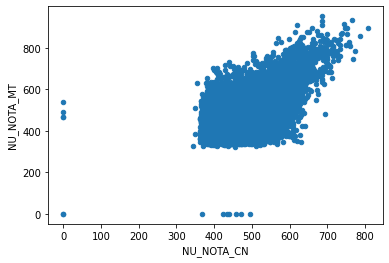

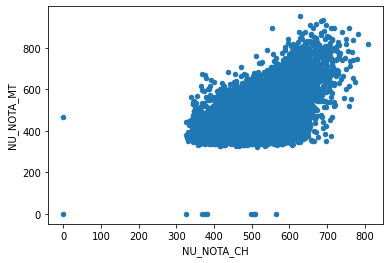

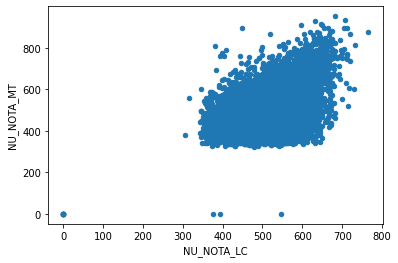

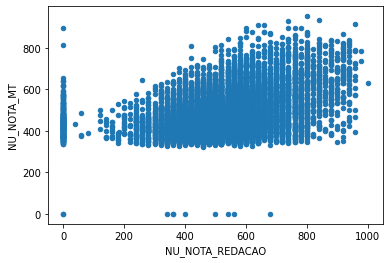

In [6]:
df_train.plot.scatter(x='NU_NOTA_CN', y='NU_NOTA_MT')
df_train.plot.scatter(x='NU_NOTA_CH', y='NU_NOTA_MT')
df_train.plot.scatter(x='NU_NOTA_LC', y='NU_NOTA_MT')
df_train.plot.scatter(x='NU_NOTA_REDACAO', y='NU_NOTA_MT')

In [7]:
features = [
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_COMP3',
    'NU_NOTA_REDACAO',
    'NU_NOTA_LC',
    'NU_NOTA_CH',
    'NU_NOTA_CN'
]
df_train[features].corr()

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_COMP3,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN
NU_NOTA_COMP1,1.000000,0.756664,0.824538,0.558587,0.759452,0.862744,0.430603,0.443809,0.357672
NU_NOTA_COMP2,0.756664,1.000000,0.808006,0.655915,0.875447,0.918278,0.453262,0.488050,0.412894
NU_NOTA_COMP4,0.824538,0.808006,1.000000,0.635018,0.827151,0.914505,0.467356,0.488797,0.407747
NU_NOTA_COMP5,0.558587,0.655915,0.635018,1.000000,0.664350,0.816248,0.441696,0.494798,0.416349
NU_NOTA_COMP3,0.759452,0.875447,0.827151,0.664350,1.000000,0.925813,0.475390,0.510452,0.429447
NU_NOTA_REDACAO,0.862744,0.918278,0.914505,0.816248,0.925813,1.000000,0.512908,0.550582,0.459938
NU_NOTA_LC,0.430603,0.453262,0.467356,0.441696,0.475390,0.512908,1.000000,0.692988,0.545667
NU_NOTA_CH,0.443809,0.488050,0.488797,0.494798,0.510452,0.550582,0.692988,1.000000,0.609543
NU_NOTA_CN,0.357672,0.412894,0.407747,0.416349,0.429447,0.459938,0.545667,0.609543,1.000000


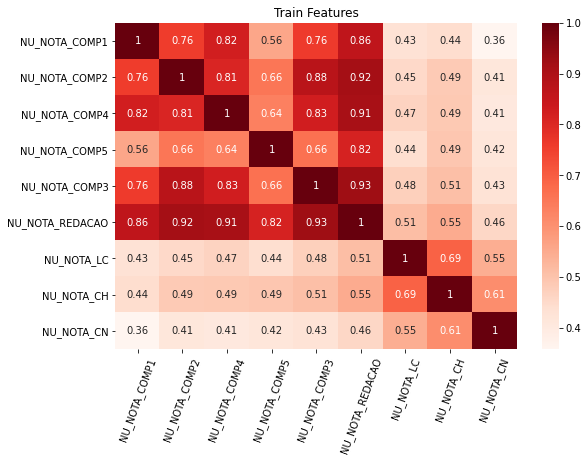

In [8]:
plt.figure(figsize=(9,6))
plt.title('Train Features')
sns.heatmap(df_train[features].corr(), annot=True, cmap='Reds')
plt.xticks(rotation=70)
plt.show()

In [9]:
df_test[features].corr()

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_COMP3,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN
NU_NOTA_COMP1,1.000000,0.758740,0.818071,0.546895,0.755680,0.858868,0.429795,0.434293,0.352608
NU_NOTA_COMP2,0.758740,1.000000,0.810890,0.645249,0.873625,0.918151,0.435176,0.467964,0.390462
NU_NOTA_COMP4,0.818071,0.810890,1.000000,0.619196,0.829071,0.912078,0.453682,0.485807,0.395787
NU_NOTA_COMP5,0.546895,0.645249,0.619196,1.000000,0.660097,0.810889,0.422711,0.478836,0.395588
NU_NOTA_COMP3,0.755680,0.873625,0.829071,0.660097,1.000000,0.926185,0.447566,0.492713,0.409225
NU_NOTA_REDACAO,0.858868,0.918151,0.912078,0.810889,0.926185,1.000000,0.495745,0.537141,0.442692
NU_NOTA_LC,0.429795,0.435176,0.453682,0.422711,0.447566,0.495745,1.000000,0.679993,0.545801
NU_NOTA_CH,0.434293,0.467964,0.485807,0.478836,0.492713,0.537141,0.679993,1.000000,0.598574
NU_NOTA_CN,0.352608,0.390462,0.395787,0.395588,0.409225,0.442692,0.545801,0.598574,1.000000


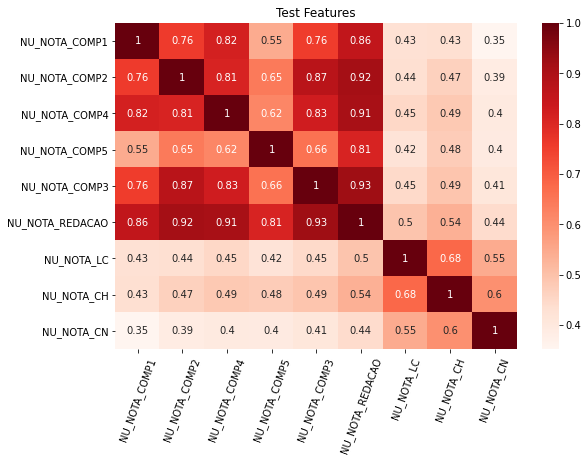

In [10]:
plt.figure(figsize=(9,6))
plt.title('Test Features')
sns.heatmap(df_test[features].corr(), annot=True, cmap='Reds')
plt.xticks(rotation=70)
plt.show()

##Data Preprocessing


* checking for null values


In [11]:
df_train[features].isnull().sum()


NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_COMP3      3597
NU_NOTA_REDACAO    3597
NU_NOTA_LC         3597
NU_NOTA_CH         3389
NU_NOTA_CN         3389
dtype: int64

In [12]:
df_train['NU_NOTA_MT'].isnull().sum()


3597

In [13]:
df_test[features].isnull().sum()


NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
NU_NOTA_COMP3      1199
NU_NOTA_REDACAO    1199
NU_NOTA_LC         1199
NU_NOTA_CH         1134
NU_NOTA_CN         1134
dtype: int64

* Filling null values with zeros


In [0]:
df_train['NU_NOTA_CN'].fillna(0, inplace=True)
df_train['NU_NOTA_CH'].fillna(0, inplace=True)
df_train['NU_NOTA_REDACAO'].fillna(0, inplace=True)
df_train['NU_NOTA_LC'].fillna(0, inplace=True)
df_train['NU_NOTA_MT'].fillna(0, inplace=True)
df_train['NU_NOTA_COMP1'].fillna(0, inplace=True)
df_train['NU_NOTA_COMP2'].fillna(0, inplace=True)
df_train['NU_NOTA_COMP3'].fillna(0, inplace=True)
df_train['NU_NOTA_COMP4'].fillna(0, inplace=True)
df_train['NU_NOTA_COMP5'].fillna(0, inplace=True)
df_test['NU_NOTA_CN'].fillna(0, inplace=True)
df_test['NU_NOTA_CH'].fillna(0, inplace=True)
df_test['NU_NOTA_REDACAO'].fillna(0, inplace=True)
df_test['NU_NOTA_LC'].fillna(0, inplace=True)
df_test['NU_NOTA_COMP1'].fillna(0, inplace=True)
df_test['NU_NOTA_COMP2'].fillna(0, inplace=True)
df_test['NU_NOTA_COMP3'].fillna(0, inplace=True)
df_test['NU_NOTA_COMP4'].fillna(0, inplace=True)
df_test['NU_NOTA_COMP5'].fillna(0, inplace=True)

* checking values

In [15]:
df_train[features].isnull().sum()


NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_COMP3      0
NU_NOTA_REDACAO    0
NU_NOTA_LC         0
NU_NOTA_CH         0
NU_NOTA_CN         0
dtype: int64

In [16]:
df_test[features].isnull().sum()

NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_COMP3      0
NU_NOTA_REDACAO    0
NU_NOTA_LC         0
NU_NOTA_CH         0
NU_NOTA_CN         0
dtype: int64

In [17]:
X = df_train[features]
X.head()

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_COMP3,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN
0,120.0,120.0,80.0,80.0,120.0,520.0,581.2,495.4,436.3
1,140.0,120.0,120.0,80.0,120.0,580.0,599.0,544.1,474.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
y = df_train['NU_NOTA_MT']
y.head()


0    399.4
1    459.8
2      0.0
3      0.0
4      0.0
Name: NU_NOTA_MT, dtype: float64

In [0]:
validation_data = df_test.copy()
validation_data_1 = validation_data.loc[:, features]
validation_data_2 = validation_data.loc[:, features]

train_X, validation_X, train_y, validation_y = train_test_split(X, y, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [0]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Models



### Linear Regression

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Getting predictions
y_pred = lr.predict(X_test)

In [23]:
# Getting r2 score
r2_score(y_test, y_pred)

0.9021194805200762

In [0]:
y_pred = lr.predict(validation_data_1)

### XGBOOST

In [24]:
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1)
model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(validation_X, validation_y)], verbose=False)

#validation_data_1.drop(['NU_INSCRICAO'], axis=1, inplace=True)
predicted_nota = model.predict(validation_data_1)
#answer_df = pd.DataFrame({'NU_INSCRICAO': validation_data_2.NU_INSCRICAO, 'NU_NOTA_LC': validation_data_2.NU_NOTA_LC, 'NU_NOTA_MT_PREDICT': predicted_nota})

[00:45:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [30]:
answer['NU_NOTA_MT'] = predicted_nota
answer.head()


,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,431.835815
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,450.068115
2,b38a03232f43b11c9d0788abaf060f7366053b6d,591.803955
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.712607
4,715494628a50142ce8cb17191cfe6d0f3cae0934,551.872559


In [0]:
answer.to_csv('answer.csv', index=False, float_format='%.1f')

Xgboost model score:  
<img src="https://github.com/EderBraz/Codenation_Enem_2016/blob/master/score.jpg?raw=true"
     alt="score 93.62%"/>